The main challenge I faced in this task was understanding the nature of the company, its requirements, and the double entry system it follows.
This system significantly impacts the results, and it took me about half of the time to fully grasp its implications so I can write the right code.
I chose to use SQLite3 for data processing, as it is lightweight and well-suited for small datasets like the one provided for this task.

P.S: I should have done data cleaning and data wrangling, as it is usually the first step in any work with data. However, since the dataset is small, I was able to check it with a quick glance.

# Task_1: formulate a textual answer

*To determine which debtor had the largest Euro volume of outstanding invoices at any given moment in January 2024, the approach considers the double-entry system:*

- Each transaction has two sides: a debit and a credit. For debtors, debit entries increase their outstanding balance, while credit entries reduce it (e.g., payments).
- Only debtor accounts (classified as Account_category = 'Asset' and Account_type = 'Debit') are analyzed.
- Net outstanding balances are calculated by summing all debits (positive) and credits (negative) for each debtor during January 2024.
- The debtor with the highest net outstanding balance at the end of this period is identified.


I am using SQLite as the data is not big.





In [13]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import requests
import seaborn as sns

# import and read the dataset
url = 'https://docs.google.com/spreadsheets/d/1NrzlEF3iYY1jvagJNtUX08ZRVslh_7d5/export?format=xlsx'
response = requests.get(url)
with open('temp.xlsx', 'wb') as f:
    f.write(response.content)
data = pd.read_excel('temp.xlsx')
print(data.head())

# Task 2: write the SQL
# Create an SQLite3 database
conn = sqlite3.connect(':memory:')

# Load the data into SQLite3 database
data.to_sql('invoices', conn, if_exists='replace', index=False)

# insure the table is loaded
query = "SELECT * FROM invoices LIMIT 5;"
df_sql = pd.read_sql(query, conn)
print(df_sql)


   Booking_id       Date  Debited_account_no  Credited_account_no  Euro
0          34 2024-01-17                1200                 4000   209
1          49 2024-01-23                1200                 4000   637
2          76 2024-02-04                1200                 4000   686
3          70 2024-02-01                1200                 4000   806
4          65 2024-01-30                1200                 4000   978
   Booking_id                 Date  Debited_account_no  Credited_account_no  \
0          34  2024-01-17 00:00:00                1200                 4000   
1          49  2024-01-23 00:00:00                1200                 4000   
2          76  2024-02-04 00:00:00                1200                 4000   
3          70  2024-02-01 00:00:00                1200                 4000   
4          65  2024-01-30 00:00:00                1200                 4000   

   Euro  
0   209  
1   637  
2   686  
3   806  
4   978  


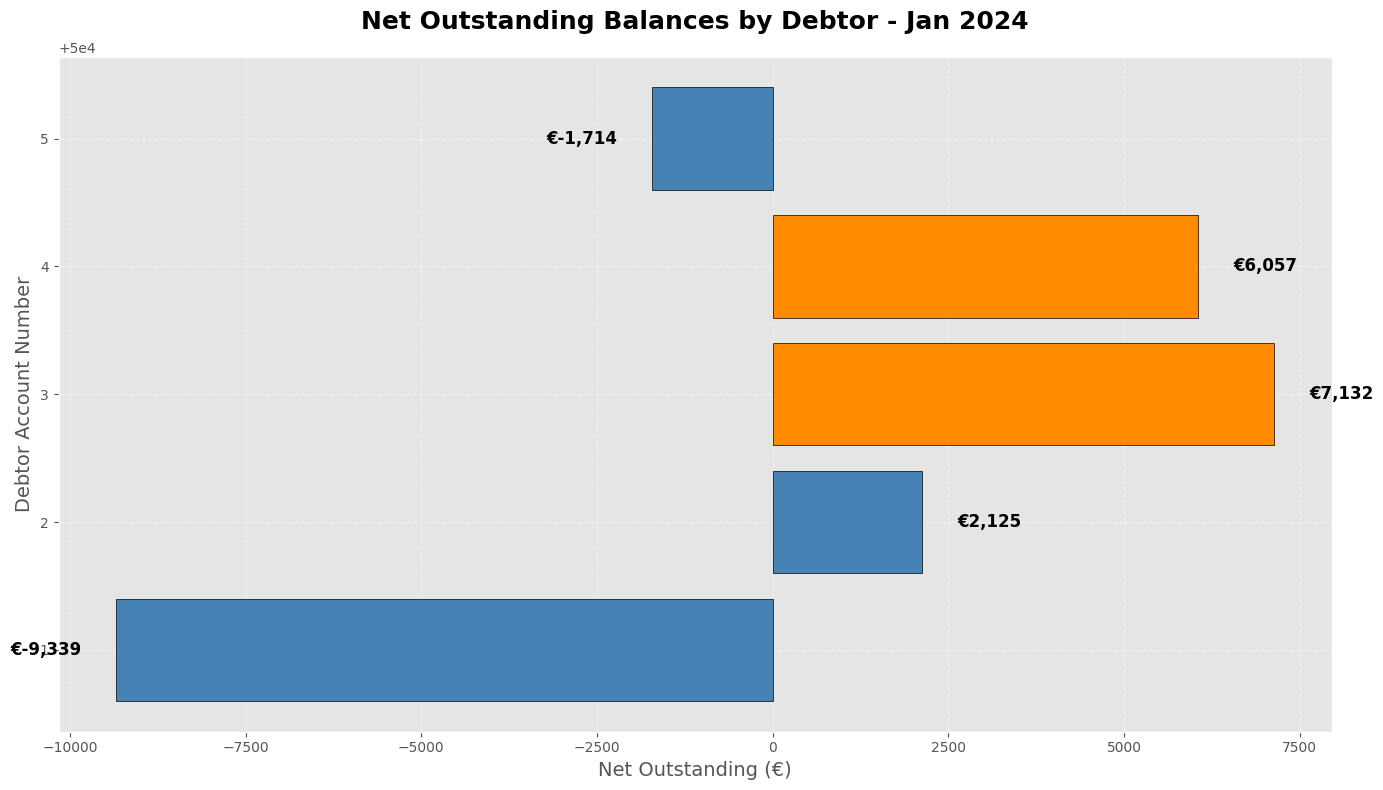

In [14]:
# Set style
plt.style.use('ggplot')
sns.set_palette("muted")

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Sort the data
chart_data = chart_data.sort_values(by='Net_Outstanding', ascending=False)

# Define colors: Highlight top 2 debtors
top_debtors = chart_data.nlargest(2, 'Net_Outstanding')['Account_no'].tolist()
colors = ['#4682B4' if acc not in top_debtors else '#FF8C00' for acc in chart_data['Account_no']]

# Plot bars
bars = ax.barh(chart_data['Account_no'], chart_data['Net_Outstanding'], color=colors, edgecolor='black')

# Add labels inside bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + (500 if width > 0 else -500)
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"€{width:,.0f}",
            ha='left' if width > 0 else 'right', va='center', fontsize=12, fontweight='bold')

# Customize axes & labels
ax.set_title('Net Outstanding Balances by Debtor - Jan 2024', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Net Outstanding (€)', fontsize=14)
ax.set_ylabel('Debtor Account Number', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()
plt.show()
